# Boston Housing Analysis
Guillaume Thibault 

```
Using Julia
```

## Data 
Harrison, D, Rubenfeld, D. (1978)
Hedonic (House) Prices and the Demand for Clean Air
J. of Environmental Economic and Management, v.5, pp. 81-102
Combined information from 10 separate governmental and education
sources 506 census tracts (CT) in city of Boston of the year 1970

---

Purpose: to study the relationship between 11 quality of life indicators and the value of a residence.


The file contains 506 observations and is divided into 2 groups
* GROUP = M for the development of the Models (405 observations: 80% of the observations)
observations);
* GROUP = T to test the model (101 observations: 20% of the observations) to include
observations) 

In [14]:
using Pkg
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("GLM")
Pkg.add("Statistics")
Pkg.add("StatsBase")
Pkg.add("StatsPlots")

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


   Resolving package versions...


   Installed OffsetArrays ────── v1.12.9


   Installed MKL_jll ─────────── v2022.2.0+0
   Installed Ratios ──────────── v0.4.3


   Installed FFTW ────────────── v1.5.0
   Installed StatsPlots ──────── v0.15.4
   Installed AbstractFFTs ────── v1.2.1
   Installed DataValues ──────── v0.4.13
   Installed NearestNeighbors ── v0.4.13


   Installed KernelDensity ───── v0.6.5
   Installed TableOperations ─── v1.2.0


   Installed Arpack_jll ──────── v3.5.1+1
   Installed Adapt ───────────── v3.5.0
   Installed Arpack ──────────── v0.5.4
   Installed MultivariateStats ─ v0.10.0
   Installed Clustering ──────── v0.14.3


   Installed Interpolations ──── v0.14.7


    Updating `~/.julia/environments/v1.8/Project.toml`
  [f3b207a7] + StatsPlots v0.15.4
    Updating `~/.julia/environments/v1.8/Manifest.toml`


  [621f4979] + AbstractFFTs v1.2.1
  [79e6a3ab] + Adapt v3.5.0
  [7d9fca2a] + Arpack v0.5.4
  [13072b0f] + AxisAlgorithms v1.0.1
  [aaaa29a8] + Clustering v0.14.3
  [e7dc6d0d] + DataValues v0.4.13
  [b4f34e82] + Distances v0.10.7
  [7a1cc6ca] + FFTW v1.5.0
  [a98d9a8b] + Interpolations v0.14.7
  [5ab0869b] + KernelDensity v0.6.5
  [6f286f6a] + MultivariateStats v0.10.0
  [b8a86587] + NearestNeighbors v0.4.13
  [6fe1bfb0] + OffsetArrays v1.12.9
  [c84ed2f1] + Ratios v0.4.3
  [f3b207a7] + StatsPlots v0.15.4
  [ab02a1b2] + TableOperations v1.2.0
  [efce3f68] + WoodburyMatrices v0.5.5
⌅ [68821587] + Arpack_jll v3.5.1+1
  [f5851436] + FFTW_jll v3.3.10+0
  [1d5cc7b8] + IntelOpenMP_jll v2018.0.3+2
  [856f044c] + MKL_jll v2022.2.0+0
  [4af54fe1] + LazyArtifacts
        Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated -m`


Precompiling project...


  ✓ Adapt


  ✓ IntelOpenMP_jll


  ✓ Ratios
  ✓ WoodburyMatrices


  ✓ Arpack_jll
  ✓ FFTW_jll


  ✓ Distances


  ✓ AbstractFFTs


  ✓ AxisAlgorithms
  ✓ TableOperations


  ✓ MKL_jll


  ✓ Arpack


  ✓ DataValues


  ✓ OffsetArrays


  ✓ MultivariateStats


  ✓ NearestNeighbors


  ✓ Interpolations


  ✓ Clustering


  ✓ FFTW


  ✓ KernelDensity


  ✓ StatsPlots
  21 dependencies successfully precompiled in 28 seconds. 209 already precompiled.


In [15]:
using CSV, DataFrames, GLM, Statistics, StatsBase, Random, StatsPlots;

In [2]:
df = CSV.read("data.csv", DataFrame);

show(df)

506×17 DataFrame
 Row │ CT     X1_CRIM  X2_NOX   X3_AGE   X4_DIS   X5_RM    X6_LSTAT  X7_RAD  X ⋯
     │ Int64  Float64  Float64  Float64  Float64  Float64  Float64   Int64   I ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │     1  0.00632    0.538     65.2   4.09      6.575      4.98       1    ⋯
   2 │     2  0.02731    0.469     78.9   4.9671    6.421      9.14       2
   3 │     3  0.02729    0.469     61.1   4.9671    7.185      4.03       2
   4 │     4  0.03237    0.458     45.8   6.0622    6.998      2.94       3
   5 │     5  0.06905    0.458     54.2   6.0622    7.147      5.33       3    ⋯
   6 │     6  0.02985    0.458     58.7   6.0622    6.43       5.21       3
   7 │     7  0.08829    0.524     66.6   5.5605    6.012     12.43       5
   8 │     8  0.14455    0.524     96.1   5.9505    6.172     19.15       5
  ⋮  │   ⋮       ⋮        ⋮        ⋮        ⋮        ⋮        ⋮        ⋮       ⋱
 500 │   500  0.17783    0.585     73.5  

In [30]:
function check_missing(df::DataFrame)
    """
    Print le nombre de valeurs manquantes par colonne
    @params:
        - df: DataFrame à analyser
    """
    for i in 1:size(df,2)
        nb_missing = count(ismissing.(df[:, i]))
        var_name = names(df)[i]
        
        println("$var_name: $nb_missing")
    end
end

check_missing(df)

CT: 0
X1_CRIM: 0
X2_NOX: 0
X3_AGE: 0
X4_DIS: 0
X5_RM: 0
X6_LSTAT: 0
X7_RAD: 0
X8_CHAS: 0
X9_NDUS: 0
X10_TAX: 0
X11_PT: 0
Y_MV: 0
GROUP: 0
X12_RLZ: 0
Column16: 506
Column17: 506


In [31]:
train = df[df.GROUP .== "M", :];
test = df[df.GROUP .== "T", :];

features = [:X1_CRIM, :X2_NOX, :X3_AGE, :X4_DIS, :X5_RM, :X6_LSTAT, :X7_RAD, :X8_CHAS, :X9_NDUS, :X10_TAX, :X11_PT, :X12_RLZ];
target = [:Y_MV];

# Convert training and test to Matrix and vector 
train_X = Matrix(train[!, features]);


Let's check the correlation between the column

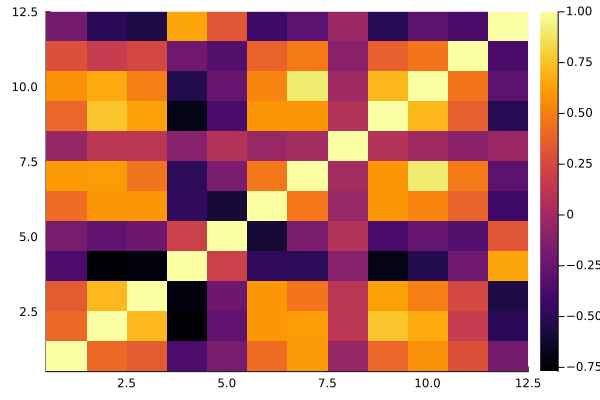

In [100]:
heatmap(cor(train_X))

## Model

#### Ordinary Regression Model

In [87]:
fm = @formula(Y_MV ~ X1_CRIM + X2_NOX + X3_AGE + X4_DIS + X5_RM + X6_LSTAT + X7_RAD + X8_CHAS + X9_NDUS + X10_TAX + X11_PT)
linearRegressor = lm(fm, train)


StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y_MV ~ 1 + X1_CRIM + X2_NOX + X3_AGE + X4_DIS + X5_RM + X6_LSTAT + X7_RAD + X8_CHAS + X9_NDUS + X10_TAX + X11_PT

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
                    Coef.  Std. Error      t  Pr(>|t|)    Lower 95%     Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)   41.4102      5.81136      7.13    <1e-11   29.9849      52.8354
X1_CRIM       -0.125124    0.0351342   -3.56    0.0004   -0.194199    -0.0560499
X2_NOX       -21.1267      4.49168     -4.70    <1e-05  -29.9574     -12.296
X3_AGE         0.00403522  0.014906     0.27    0.7868   -0.0252703    0.0333407
X4_DIS        -1.29162     0.210649    -6.13    <1e-08   -1.70576     -0.877482
X5_RM          3.90014     0.480049 

A variable in linear regression model is said to be statistically significant only if the p-value is less than a pre-determined statistical significance level, which usually is 0.05.

Taking this value, we have to feature that are not relevant, AGE and INDUS in our case.

In [68]:
# R Square value of the model
r2(linearRegressor)

0.7238577323329753

Now that the model is ready, Let’s create the performance metrics. I will predict on both the training and test data and compute squared errors.


In [69]:
# Prediction
ypredicted_test = predict(linearRegressor, test)
ypredicted_train = predict(linearRegressor, train)

# Test Performance DataFrame (compute squared error)
performance_testdf = DataFrame(y_actual = test[!,:Y_MV], y_predicted = ypredicted_test)
performance_testdf.error = performance_testdf[!,:y_actual] - performance_testdf[!,:y_predicted]
performance_testdf.error_sq = performance_testdf.error.*performance_testdf.error

# Train Performance DataFrame (compute squared error)
performance_traindf = DataFrame(y_actual = train[!,:Y_MV], y_predicted = ypredicted_train)
performance_traindf.error = performance_traindf[!,:y_actual] - performance_traindf[!,:y_predicted]
performance_traindf.error_sq = performance_traindf.error.*performance_traindf.error ;

In [70]:
function mape(performance_df)
    mape = mean(abs.(performance_df.error./performance_df.y_actual))
    return mape
end

function rmse(performance_df)
    rmse = sqrt(mean(performance_df.error.*performance_df.error))
    return rmse
end

# Test Error
println("Mean Absolute test error: ",mean(abs.(performance_testdf.error)))
println("Mean Aboslute Percentage test error: ",mape(performance_testdf))
println("Root mean square test error: ",rmse(performance_testdf))
println("Mean square test error: ",mean(performance_testdf.error_sq), "\n")

println("Mean train error: ",mean(abs.(performance_traindf.error)))
println("Mean Absolute Percentage train error: ",mape(performance_traindf))
println("Root mean square train error: ",rmse(performance_traindf))
println("Mean square train error: ",mean(performance_traindf.error_sq))

Mean Absolute test error: 3.2287271763328462
Mean Aboslute Percentage test error: 0.17790675906844744
Root mean square test error: 4.142776790831797
Mean square test error: 17.162599538654604

Mean train error: 3.436017619620194
Mean Absolute Percentage train error: 0.17075823774234672
Root mean square train error: 4.888416802155809
Mean square train error: 23.896618831599223


Let's check the residual

Histogram of error to see if it's normally distributed

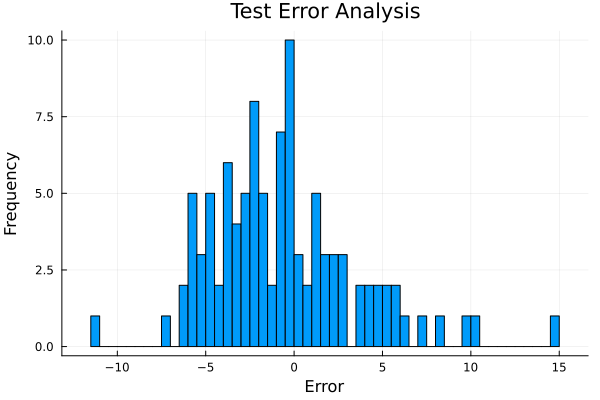

In [71]:
histogram(performance_testdf.error, bins = 50, title = "Test Error Analysis", ylabel = "Frequency", xlabel = "Error",legend = false)

Scatter plot of actual vs predicted values

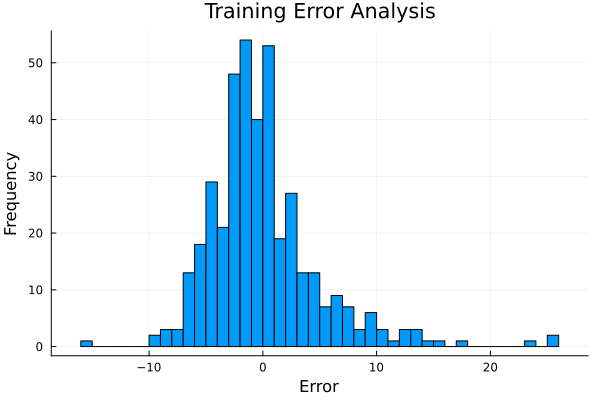

In [72]:
histogram(performance_traindf.error, bins = 50, title = "Training Error Analysis", ylabel = "Frequency", xlabel = "Error",legend = false)


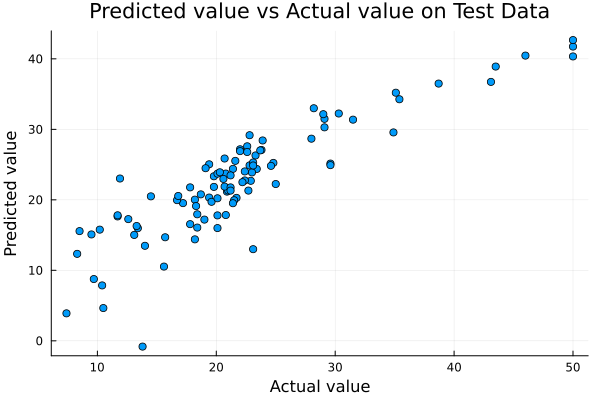

In [73]:
test_plot = scatter(performance_testdf[!,:y_actual],performance_testdf[!,:y_predicted], title = "Predicted value vs Actual value on Test Data", ylabel = "Predicted value", xlabel = "Actual value", legend = false)

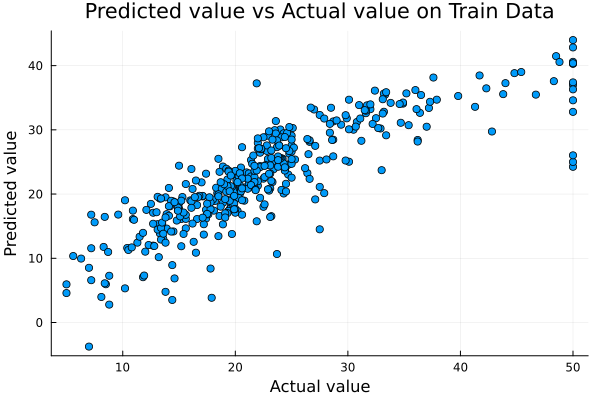

In [74]:
train_plot = scatter(performance_traindf[!,:y_actual],performance_traindf[!,:y_predicted], title = "Predicted value vs Actual value on Train Data", ylabel = "Predicted value", xlabel = "Actual value",legend = false)


#### Removing the indep variable with p-value > 0.05

In [88]:
fm = @formula(Y_MV ~ X1_CRIM + X2_NOX + X4_DIS + X5_RM + X6_LSTAT + X7_RAD + X8_CHAS + X10_TAX + X11_PT)
linearRegressor = lm(fm, train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y_MV ~ 1 + X1_CRIM + X2_NOX + X4_DIS + X5_RM + X6_LSTAT + X7_RAD + X8_CHAS + X10_TAX + X11_PT

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error       t  Pr(>|t|)    Lower 95%     Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)   41.3327      5.78164      7.15    <1e-11   29.966       52.6993
X1_CRIM       -0.125173    0.0350243   -3.57    0.0004   -0.19403     -0.0563155
X2_NOX       -20.858       4.17026     -5.00    <1e-06  -29.0567     -12.6593
X4_DIS        -1.30988     0.188273    -6.96    <1e-10   -1.68002     -0.93974
X5_RM          3.92401     0.467758     8.39    <1e-15    3.00441      4.84362
X6_LSTAT      -0.55885     0.0548554  -10.19    <1e-21   

In [89]:
# R Square value of the model
r2(linearRegressor)

0.7195844501392781

In [90]:
# Prediction
ypredicted_test = predict(linearRegressor, test)
ypredicted_train = predict(linearRegressor, train)

# Test Performance DataFrame (compute squared error)
performance_testdf = DataFrame(y_actual = test[!,:Y_MV], y_predicted = ypredicted_test)
performance_testdf.error = performance_testdf[!,:y_actual] - performance_testdf[!,:y_predicted]
performance_testdf.error_sq = performance_testdf.error.*performance_testdf.error

# Train Performance DataFrame (compute squared error)
performance_traindf = DataFrame(y_actual = train[!,:Y_MV], y_predicted = ypredicted_train)
performance_traindf.error = performance_traindf[!,:y_actual] - performance_traindf[!,:y_predicted]
performance_traindf.error_sq = performance_traindf.error.*performance_traindf.error ;


function mape(performance_df)
    mape = mean(abs.(performance_df.error./performance_df.y_actual))
    return mape
end

function rmse(performance_df)
    rmse = sqrt(mean(performance_df.error.*performance_df.error))
    return rmse
end

# Test Error
println("Mean Absolute test error: ",mean(abs.(performance_testdf.error)))
println("Mean Aboslute Percentage test error: ",mape(performance_testdf))
println("Root mean square test error: ",rmse(performance_testdf))
println("Mean square test error: ",mean(performance_testdf.error_sq), "\n")

println("Mean train error: ",mean(abs.(performance_traindf.error)))
println("Mean Absolute Percentage train error: ",mape(performance_traindf))
println("Root mean square train error: ",rmse(performance_traindf))
println("Mean square train error: ",mean(performance_traindf.error_sq))



Mean Absolute test error: 3.3500360859017198
Mean Aboslute Percentage test error: 0.18356379907855347
Root mean square test error: 4.2644865708823625
Mean square test error: 18.185845713236013

Mean train error: 

3.48938994958239
Mean Absolute Percentage train error: 0.17350915196780134
Root mean square train error: 4.926095546102191
Mean square train error: 24.266417329327847


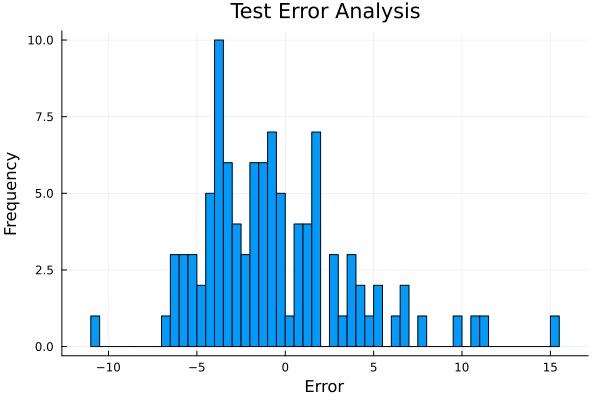

In [94]:
histogram(performance_testdf.error, bins = 50, title = "Test Error Analysis", ylabel = "Frequency", xlabel = "Error",legend = false)

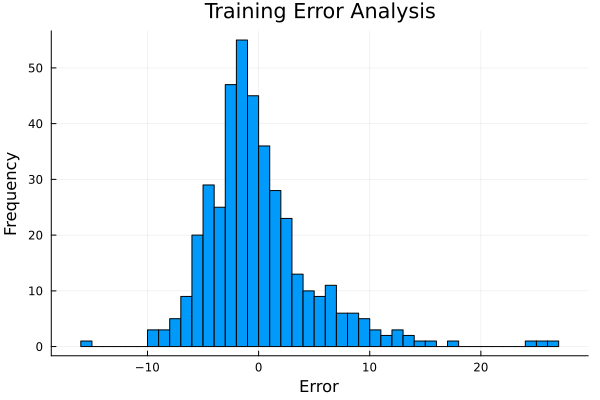

In [98]:
histogram(performance_traindf.error, bins = 50, title = "Training Error Analysis", ylabel = "Frequency", xlabel = "Error",legend = false)


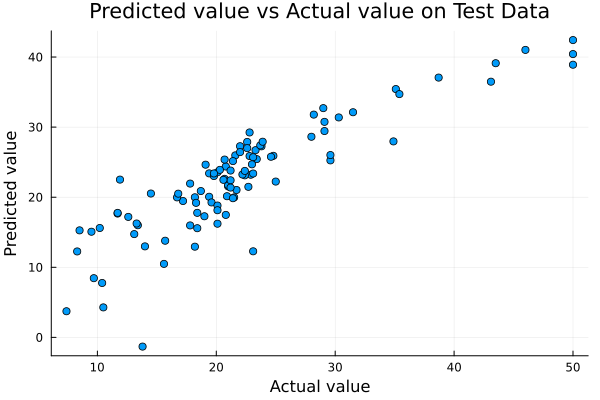

In [93]:
test_plot = scatter(performance_testdf[!,:y_actual],performance_testdf[!,:y_predicted], title = "Predicted value vs Actual value on Test Data", ylabel = "Predicted value", xlabel = "Actual value", legend = false)


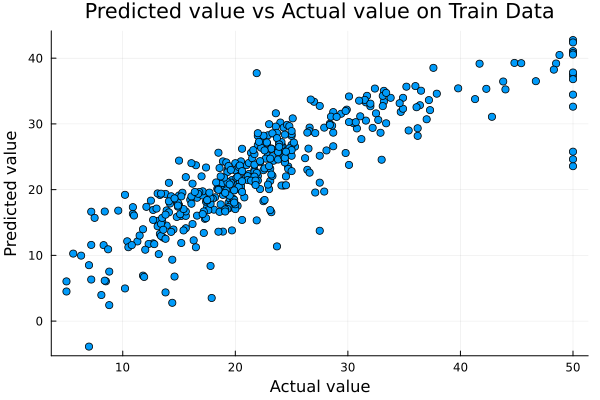

In [97]:
train_plot = scatter(performance_traindf[!,:y_actual],performance_traindf[!,:y_predicted], title = "Predicted value vs Actual value on Train Data", ylabel = "Predicted value", xlabel = "Actual value",legend = false)
